In [1]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import os
from datetime import datetime as dt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#set path
path = r'C:\Users\nrsmi\Documents\CareerFoundry\New_York_CitiBike_Analysis'
# import df
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared_Data', 'Weather_DailyBikeRides_RideDuration.csv'), index_col = 0 )

C:\Users\nrsmi\AppData\Local\Temp\ipykernel_8692\1155851793.py:4: DtypeWarning: Columns (7,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path, 'Data', 'Prepared_Data', 'Weather_DailyBikeRides_RideDuration.csv'), index_col = 0 )


In [3]:
df.head()

,date,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,ride_duration
0,2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,20428,3.831733
1,2022-01-01,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,24.885933
2,2022-01-01,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,11.776867
3,2022-01-01,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,11.6,20428,25.322883
4,2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,20428,3.258917


In [4]:
df.isnull().sum()

date                      0
ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name       49
start_station_id         49
end_station_name      69884
end_station_id        69884
start_lat                 0
start_lng                 0
end_lat               37223
end_lng               37223
member_casual             0
avgTemp                   0
bike_rides_daily          0
ride_duration             0
dtype: int64

In [5]:
df.shape

(29837809, 17)

In [6]:
# Drop rows with any null values
df = df.dropna()

In [7]:
df.head()

,date,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,ride_duration
0,2022-01-01,4A091640AEC83471,classic_bike,2022-01-01 16:01:22.082,2022-01-01 16:05:11.986,S 4 St & Wythe Ave,5204.05,Kent Ave & S 11 St,5062.01,40.712859,-73.965903,40.707645,-73.968415,member,11.6,20428,3.831733
1,2022-01-01,7A560D6287C00126,classic_bike,2022-01-01 14:07:04.344,2022-01-01 14:31:57.500,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,24.885933
2,2022-01-01,4F6F726B809C15E4,classic_bike,2022-01-01 12:02:26.943,2022-01-01 12:14:13.555,Lexington Ave & E 120 St,7652.04,Amsterdam Ave & W 125 St,7800.03,40.801307,-73.939817,40.813358,-73.956461,member,11.6,20428,11.776867
3,2022-01-01,3BC10DC94FD79955,classic_bike,2022-01-01 22:53:23.508,2022-01-01 23:18:42.881,Cleveland Pl & Spring St,5492.05,Mott St & Prince St,5561.04,40.722104,-73.997249,40.723180,-73.994800,member,11.6,20428,25.322883
4,2022-01-01,FE4CE7F1CFFD7952,classic_bike,2022-01-01 08:04:51.755,2022-01-01 08:08:07.290,Central Park North & Adam Clayton Powell Blvd,7617.07,E 110 St & Madison Ave,7587.14,40.799484,-73.955613,40.796154,-73.947821,member,11.6,20428,3.258917


In [8]:
# Count rows where ride_duration is less than 1 minute
less_than_one_minute_count = (df['ride_duration'] < 1).sum()

In [9]:
less_than_one_minute_count

np.int64(0)

In [10]:
# Filter rows where ride_duration is more than 7 days
long_rides = df[df['ride_duration'] > 300080]

In [11]:
long_rides

,date,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,avgTemp,bike_rides_daily,ride_duration
1913636,2022-02-21,A67773E48806E394,classic_bike,2022-02-21 14:51:07.071,2022-11-29 12:12:07.423,W 34 St & Hudson Blvd E,6535.04,Morgan Bike Mechanics,SYS016,40.755167,-74.000599,40.709628,-73.931457,casual,4.1,52366,404481.005867


# 6. Make a box plot of one of the categorical variables in your data set. What does this plot tell you about the variable? Write down a 3 to 5-sentence analysis of the elements of the box plot.

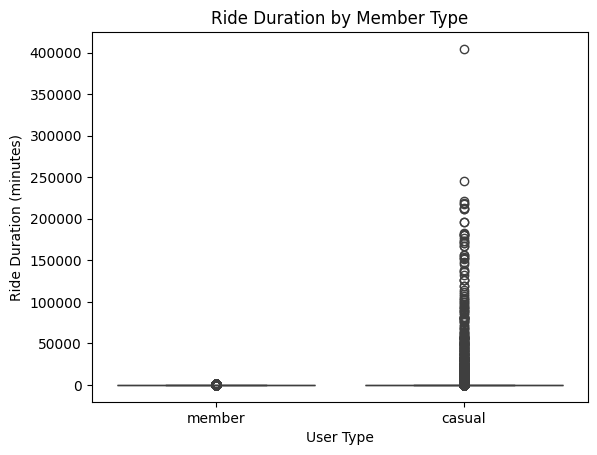

In [13]:
# Create a box plot to compare ride durations by member type
box1 = sns.boxplot(data=df, x="member_casual", y="ride_duration")
plt.title("Ride Duration by Member Type")
plt.xlabel("User Type")
plt.ylabel("Ride Duration (minutes)")
plt.show()

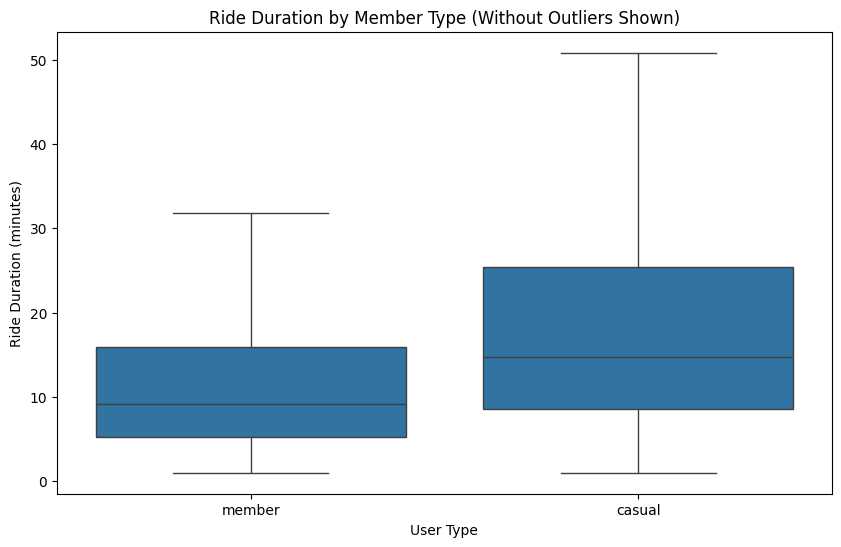

In [14]:
# Box plot without outliers
plt.figure(figsize=(10, 6))
box2 = sns.boxplot(data=df, x="member_casual", y="ride_duration", showfliers=False)
plt.title("Ride Duration by Member Type (Without Outliers Shown)")
plt.xlabel("User Type")
plt.ylabel("Ride Duration (minutes)")
plt.show()

The first plot (with outliers) highlights the presence of extreme values in the ride_duration variable, especially for casual users. Some ride durations exceed 400,000 minutes (over 277 days), which are likely data errors or cases of unreturned bikes. These extreme outliers significantly distort the overall distribution and make it challenging to interpret the typical ride patterns of both user types. While members also have a few outliers, they are far less frequent and less extreme compared to casual users.

The second plot (without outliers) provides a clearer view of the ride duration distributions. It shows that casual users tend to have longer and more variable ride durations compared to members, as reflected in their higher median and wider interquartile range (IQR). Members exhibit shorter and more consistent ride durations, likely indicative of routine commuting patterns. Removing outliers allows for more meaningful analysis, emphasizing the differences between the two user groups.

# 7. Think of how the FacetGrid plot would make sense to aid the analysis questions in the project. Create a FacetGrid and write 2 to 3 sentences analyzing what insight its output brings.

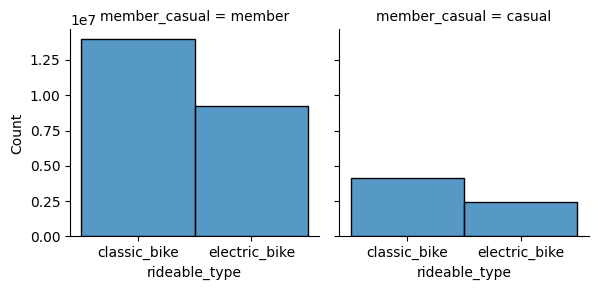

In [17]:
grid = sns.FacetGrid(df, col = "member_casual")
grid.map(sns.histplot, "rideable_type", bins = 15)
plt.show()

The FacetGrid shows the distribution of bike types (rideable_type) for members and casual users, allowing a comparison between the two user groups. Members predominantly use classic bikes, while electric bikes are used less frequently. In contrast, casual users also favor classic bikes, but the proportion of electric bike usage is noticeably higher compared to members.

This plot highlights that classic bikes are the most commonly used type across both groups, but casual users are more likely to use electric bikes. This could suggest that casual users prefer electric bikes for convenience or longer rides, whereas members stick to classic bikes, potentially for routine commutes or affordability.